## Project: Loan Status Classification

### Chetan Shastry

In [230]:
import numpy as np
import pandas as pd 
import os
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")

In [231]:
import os
os.getcwd()

'C:\\Users\\pallavi.chagi\\Downloads\\Testing the Models Loans'

In [232]:
os.chdir(r"C:\Users\pallavi.chagi\Downloads\Testing the Models Loans")  

In [233]:
df = pd.read_csv('Loans - Public Test Set (No Labels).csv') 

In [234]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,44454.00,44454.00,44454.00,44454.00,44452.00,44454.00,44454.00,44454.00,44452.00,44452.00
mean,14000.40,721.55,72628.16,18.30,15.61,11.16,0.16,15668.18,0.11,0.03
std,8265.36,27.56,54480.82,7.05,22.57,5.03,0.47,20278.74,0.34,0.25
min,504.00,585.00,2979.00,3.40,0.00,0.00,0.00,0.00,0.00,0.00
25%,7819.00,710.00,44823.50,13.50,0.00,8.00,0.00,6005.25,0.00,0.00
50%,12060.50,731.00,61825.50,17.00,0.00,10.00,0.00,11214.00,0.00,0.00
75%,19526.00,741.00,87233.50,21.70,28.00,14.00,0.00,19501.00,0.00,0.00
max,35875.00,751.00,5001000.00,61.50,151.00,50.00,13.00,975995.00,7.00,13.00


## Total Missing Values per column

In [235]:
df.isna().sum()

Loan ID                            0
Customer ID                        0
Loan Status                        0
Current Loan Amount                0
Term                               0
Credit Score                       0
Years in current job            1850
Home Ownership                     0
Annual Income                      0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent       2
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                2
Bankruptcies                       2
Tax Liens                          2
dtype: int64

## Data Type of Features

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44454 entries, 0 to 44453
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       44454 non-null  object 
 1   Customer ID                   44454 non-null  object 
 2   Loan Status                   44454 non-null  object 
 3   Current Loan Amount           44454 non-null  int64  
 4   Term                          44454 non-null  object 
 5   Credit Score                  44454 non-null  int64  
 6   Years in current job          42604 non-null  object 
 7   Home Ownership                44454 non-null  object 
 8   Annual Income                 44454 non-null  int64  
 9   Purpose                       44454 non-null  object 
 10  Monthly Debt                  44454 non-null  object 
 11  Years of Credit History       44454 non-null  float64
 12  Months since last delinquent  44452 non-null  float64
 13  N

In [237]:
train_df = df

## Shape of Data

In [238]:
train_df.shape

(44454, 19)

## Handling Duplicate Values

In [239]:
train_df.duplicated().sum()

0

In [240]:
train_df.drop_duplicates(inplace = True)

In [241]:
train_df.duplicated().sum()

0

In [242]:
train_df.shape

(44454, 19)

In [243]:
train_df.drop_duplicates(subset=["Loan ID"], keep='last', inplace=True)

In [244]:
train_df.shape

(44454, 19)

## Data Cleaning Pipeline

In [245]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('$',' ')

In [246]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('<','').str.replace('year','').str.strip()

In [247]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('s','').str.strip()

In [248]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('+','').str.strip()

In [249]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('n/a','').str.strip()

In [250]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('-','').str.strip()

In [251]:
train_df['Credit Score'] = train_df['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

In [252]:
train_df['Home Ownership'].replace({'HaveMortgage': 'Home Mortgage'}, inplace =True)

In [253]:
train_df['Purpose'].replace({'other': 'Other'}, inplace =True)

In [254]:
#train_df['Years in current_job'] = train_df['Years in current job'].astype(object)

In [255]:
train_df['Monthly Debt'] = train_df['Monthly Debt'].str.replace('$',' ')

In [256]:
train_df['Monthly Debt'] = train_df['Monthly Debt'].astype(str).replace(',', '', regex=True)

In [257]:
train_df['Monthly Debt'] = train_df['Monthly Debt'].astype(float)

In [258]:
train_df['Maximum Open Credit'] = pd.to_numeric(train_df['Maximum Open Credit'], errors='coerce')

In [259]:
train_df['Maximum Open Credit'] = train_df['Maximum Open Credit'].astype(float)

In [260]:
train_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,03e0da0c-fac3-42f8-a396-ed5a226466e0,16ecb7be-c90f-4bdb-b168-da705d9b1fa7,Fully Paid,23023,Long Term,597,10,Home Mortgage,72230,Debt Consolidation,613.96,14.00,NaN,11,0,23188,NaN,NaN,NaN
1,01825d5d-429a-4de6-b3d4-8618364d2df2,9e0609db-23c1-43b0-9326-0e67ca1e8f1d,Charged Off,8126,Short Term,696,2,Rent,55869,Debt Consolidation,665.78,10.90,NaN,14,0,6135,NaN,NaN,NaN
2,c159a79a-8d2b-447c-92a9-052b5466d6cd,c54e404f-1e94-45a2-9473-972e2f3c378b,Fully Paid,5042,Short Term,745,10,Home Mortgage,40332,Debt Consolidation,873.86,16.40,11.00,6,0,6698,17958.00,0.00,0.00
3,c1428058-2dc6-4a88-b64c-b6034dfb4f8f,37923e4e-df73-4093-a4b8-c2dfcbd0c8d8,Charged Off,14139,Long Term,677,1,Rent,70693,Debt Consolidation,482.48,19.50,33.00,8,0,5928,7273.00,0.00,0.00
4,20344186-79bd-487a-b7c4-f3c7b57fe3e8,d5dc29d5-06f9-452e-9d55-c1d543dca5dd,Charged Off,15191,Long Term,716,10,Home Mortgage,38442,Debt Consolidation,611.87,17.80,0.00,4,0,10714,11243.00,0.00,0.00


In [261]:
train_df.duplicated().sum()

0

In [262]:
train_df.shape

(44454, 19)

In [263]:
train_df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

## Drop Nominal columns

In [264]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [265]:
df.drop(columns=['Loan ID','Customer ID'],axis=1, inplace=True )

In [266]:
df.shape

(44454, 17)

In [267]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,44454.00,44454.00,44454.00,44454.00,44454.00,44452.00,44454.00,44454.00,44454.00,44451.00,44452.00,44452.00
mean,14000.40,721.55,72628.16,970.25,18.30,15.61,11.16,0.16,15668.18,37694.80,0.11,0.03
std,8265.36,27.56,54480.82,634.03,7.05,22.57,5.03,0.47,20278.74,851083.02,0.34,0.25
min,504.00,585.00,2979.00,0.00,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7819.00,710.00,44823.50,537.91,13.50,0.00,8.00,0.00,6005.25,12900.00,0.00,0.00
50%,12060.50,731.00,61825.50,851.31,17.00,0.00,10.00,0.00,11214.00,22054.00,0.00,0.00
75%,19526.00,741.00,87233.50,1262.64,21.70,28.00,14.00,0.00,19501.00,36450.50,0.00,0.00
max,35875.00,751.00,5001000.00,9835.30,61.50,151.00,50.00,13.00,975995.00,176332155.00,7.00,13.00


## EDA

In [ ]:
import pandas as pd
import pandas_profiling

# Load dataset
data = pd.read_csv("Loans - Training Set _Original.csv")

# Generate EDA report
profile = pandas_profiling.ProfileReport(data)
profile.to_file("Test_data_EDA.html")

## Conditional Probablity for Category columns

In [ ]:
tab = pd.crosstab(df.Loan_Status, columns="Frequency")
tab/n * 100 

In [ ]:
#Conditional probabilty table conditioned on columns
table = pd.crosstab(df.Loan_Status,columns=df.Home_Ownership)
coltotal = table.sum(axis=0)
table.div(coltotal,axis=1)

In [ ]:
#Conditional probabilty table conditioned on columns
table = pd.crosstab(df.Loan_Status,columns=df.Purpose)
coltotal = table.sum(axis=0)
table.div(coltotal,axis=1)

In [ ]:
#Conditional probabilty table conditioned on columns
table = pd.crosstab(df.Loan_Status,columns=df.Number_of_Credit_Problems)
coltotal = table.sum(axis=0)
table.div(coltotal,axis=1)

In [ ]:
#Conditional probabilty table conditioned on columns
table = pd.crosstab(df.Loan_Status,columns=df.Bankruptcies)
coltotal = table.sum(axis=0)
table.div(coltotal,axis=1)

In [ ]:
#Conditional probabilty table conditioned on columns
table = pd.crosstab(df.Loan_Status,columns=df.Tax_Liens)
coltotal = table.sum(axis=0)
table.div(coltotal,axis=1)

In [ ]:
#Conditional probabilty table conditioned on columns
table = pd.crosstab(df.Loan_Status,columns=df.Term)
coltotal = table.sum(axis=0)
table.div(coltotal,axis=1)

In [ ]:
tab = pd.crosstab(df.Term, columns="Frequency")
tab/n * 100

In [ ]:
tab = pd.crosstab(df.Credit_Score, columns="Frequency")
tab/n * 100

In [ ]:
tab = pd.crosstab(df.Years_in_current_job, columns="Frequency")
tab/n * 100

In [ ]:
tab = pd.crosstab(df.Home_Ownership, columns="Frequency")
tab/n * 100

In [ ]:
tab = pd.crosstab(df.Purpose, columns="Frequency")
tab/n * 100

In [ ]:
tab = pd.crosstab(df.Months_since_last_delinquent, columns="Frequency")
tab/n * 100

In [ ]:
tab = pd.crosstab(df.Number_of_Open_Accounts, columns="Frequency")
tab/n * 100

In [ ]:
tab = pd.crosstab(df.Number_of_Credit_Problems, columns="Frequency")
tab/n * 100

In [ ]:
tab = pd.crosstab(df.Bankruptcies, columns="Frequency")
tab/n * 100

In [ ]:
tab = pd.crosstab(df.Tax_Liens, columns="Frequency")
tab/n * 100

## Label Encoding

In [268]:
cat_data = ['Loan Status','Term','Home Ownership','Purpose']

In [269]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [270]:
for col in cat_data:
    train_df[col]=le.fit_transform(train_df[col])
    print(le.classes_)

['Charged Off' 'Fully Paid']
['Long Term' 'Short Term']
['Home Mortgage' 'Own Home' 'Rent']
['Business Loan' 'Buy House' 'Buy a Car' 'Debt Consolidation'
 'Educational Expenses' 'Home Improvements' 'Medical Bills' 'Other'
 'Take a Trip' 'major_purchase' 'moving' 'renewable_energy'
 'small_business' 'vacation' 'wedding']


In [271]:
train_df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,23023,0,597,10,0,72230,3,613.96,14.00,NaN,11,0,23188,NaN,NaN,NaN
1,0,8126,1,696,2,2,55869,3,665.78,10.90,NaN,14,0,6135,NaN,NaN,NaN
2,1,5042,1,745,10,0,40332,3,873.86,16.40,11.00,6,0,6698,17958.00,0.00,0.00
3,0,14139,0,677,1,2,70693,3,482.48,19.50,33.00,8,0,5928,7273.00,0.00,0.00
4,0,15191,0,716,10,0,38442,3,611.87,17.80,0.00,4,0,10714,11243.00,0.00,0.00


In [272]:
train_df.shape

(44454, 17)

In [273]:
train_df

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,23023,0,597,10,0,72230,3,613.96,14.00,NaN,11,0,23188,NaN,NaN,NaN
1,0,8126,1,696,2,2,55869,3,665.78,10.90,NaN,14,0,6135,NaN,NaN,NaN
2,1,5042,1,745,10,0,40332,3,873.86,16.40,11.00,6,0,6698,17958.00,0.00,0.00
3,0,14139,0,677,1,2,70693,3,482.48,19.50,33.00,8,0,5928,7273.00,0.00,0.00
4,0,15191,0,716,10,0,38442,3,611.87,17.80,0.00,4,0,10714,11243.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44449,0,12292,1,735,NaN,2,60506,3,1089.12,18.30,51.00,13,0,12844,23352.00,0.00,0.00
44450,1,4931,1,743,9,2,34514,3,509.07,13.00,0.00,8,1,3685,8570.00,1.00,0.00
44451,0,23272,0,632,10,2,68663,3,1224.49,15.50,0.00,16,0,14058,23828.00,0.00,0.00
44452,0,18611,0,668,10,2,44312,3,242.24,31.80,24.00,11,0,6618,19295.00,0.00,0.00


## KNN Imputation

In [274]:
from sklearn.impute import KNNImputer
import pandas as pd

# Create a sample DataFrame with missing values
df = train_df
# Create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the DataFrame to impute missing values
df_imputed = imputer.fit_transform(df)

In [275]:
df_imputed = pd.DataFrame(df_imputed)

In [276]:
df_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.00,23023.00,0.00,597.00,10.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,0.00,23188.00,31732.00,0.00,0.00
1,0.00,8126.00,1.00,696.00,2.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,0.00,6135.00,13095.60,0.20,0.00
2,1.00,5042.00,1.00,745.00,10.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,0.00,6698.00,17958.00,0.00,0.00
3,0.00,14139.00,0.00,677.00,1.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,0.00,5928.00,7273.00,0.00,0.00
4,0.00,15191.00,0.00,716.00,10.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,0.00,10714.00,11243.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44449,0.00,12292.00,1.00,735.00,4.80,2.00,60506.00,3.00,1089.12,18.30,51.00,13.00,0.00,12844.00,23352.00,0.00,0.00
44450,1.00,4931.00,1.00,743.00,9.00,2.00,34514.00,3.00,509.07,13.00,0.00,8.00,1.00,3685.00,8570.00,1.00,0.00
44451,0.00,23272.00,0.00,632.00,10.00,2.00,68663.00,3.00,1224.49,15.50,0.00,16.00,0.00,14058.00,23828.00,0.00,0.00
44452,0.00,18611.00,0.00,668.00,10.00,2.00,44312.00,3.00,242.24,31.80,24.00,11.00,0.00,6618.00,19295.00,0.00,0.00


In [277]:
df_imputed.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [278]:
df_imputed = df_imputed.rename(columns={0: 'Loan Status'})

In [279]:
df_imputed

,Loan Status,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.00,23023.00,0.00,597.00,10.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,0.00,23188.00,31732.00,0.00,0.00
1,0.00,8126.00,1.00,696.00,2.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,0.00,6135.00,13095.60,0.20,0.00
2,1.00,5042.00,1.00,745.00,10.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,0.00,6698.00,17958.00,0.00,0.00
3,0.00,14139.00,0.00,677.00,1.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,0.00,5928.00,7273.00,0.00,0.00
4,0.00,15191.00,0.00,716.00,10.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,0.00,10714.00,11243.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44449,0.00,12292.00,1.00,735.00,4.80,2.00,60506.00,3.00,1089.12,18.30,51.00,13.00,0.00,12844.00,23352.00,0.00,0.00
44450,1.00,4931.00,1.00,743.00,9.00,2.00,34514.00,3.00,509.07,13.00,0.00,8.00,1.00,3685.00,8570.00,1.00,0.00
44451,0.00,23272.00,0.00,632.00,10.00,2.00,68663.00,3.00,1224.49,15.50,0.00,16.00,0.00,14058.00,23828.00,0.00,0.00
44452,0.00,18611.00,0.00,668.00,10.00,2.00,44312.00,3.00,242.24,31.80,24.00,11.00,0.00,6618.00,19295.00,0.00,0.00


## Renaming KNN data

In [280]:
df_imputed = df_imputed.rename(columns={1:'Current_Loan_Amount',2:'Term',3:'Credit_Score',4:'Years_in_current_job',5:'Home_Ownership',
                       6:'Annual_Income',7:'Purpose',8:'Monthly Debt',9:'Years_of_Credit_History',
                       10:'Months_since_last_delinquent',11:'Number_of_Open_Accounts',12:'Number_of_Credit_Problems',
                      13:'Current_Credit_Balance',14:'Maximum_Open_Credit',15:'Bankruptcies',16:'Tax Liens'})

In [281]:
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens
0,1.00,23023.00,0.00,597.00,10.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,0.00,23188.00,31732.00,0.00,0.00
1,0.00,8126.00,1.00,696.00,2.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,0.00,6135.00,13095.60,0.20,0.00
2,1.00,5042.00,1.00,745.00,10.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,0.00,6698.00,17958.00,0.00,0.00
3,0.00,14139.00,0.00,677.00,1.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,0.00,5928.00,7273.00,0.00,0.00
4,0.00,15191.00,0.00,716.00,10.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,0.00,10714.00,11243.00,0.00,0.00


## Feature Engineering

## Binning - Credit_Score

In [282]:
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

<AxesSubplot:title={'center':'Number of loans in terms of Credit Score category'}>

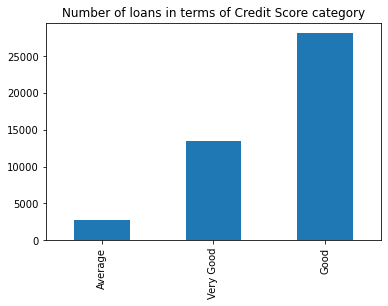

In [283]:
df_imputed['Credit_Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')

In [284]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Credit_Score'], drop_first = True))
df_imputed.rename(index = str, columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'})
df_imputed = df_imputed.drop(['Credit_Score'], axis=1);

In [285]:
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens,Good,Very Good
0,1.00,23023.00,0.00,10.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,0.00,23188.00,31732.00,0.00,0.00,0,0
1,0.00,8126.00,1.00,2.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,0.00,6135.00,13095.60,0.20,0.00,1,0
2,1.00,5042.00,1.00,10.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,0.00,6698.00,17958.00,0.00,0.00,0,1
3,0.00,14139.00,0.00,1.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,0.00,5928.00,7273.00,0.00,0.00,1,0
4,0.00,15191.00,0.00,10.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,0.00,10714.00,11243.00,0.00,0.00,1,0


## Binning - Years_in_current_job

In [286]:
df_imputed['Employment History'] = df_imputed['Years_in_current_job'].apply(lambda x: "Emp Level Jr." if x<4 else ("Emp Level Mid" if x>4 and x<8 else "Emp Senior"))
df_imputed = df_imputed.drop(['Years_in_current_job'], axis=1)
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Employment History'],drop_first = True))
df_imputed = df_imputed.drop(['Employment History'], axis=1)

In [287]:
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens,Good,Very Good,Emp Level Mid,Emp Senior
0,1.00,23023.00,0.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,0.00,23188.00,31732.00,0.00,0.00,0,0,0,1
1,0.00,8126.00,1.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,0.00,6135.00,13095.60,0.20,0.00,1,0,0,0
2,1.00,5042.00,1.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,0.00,6698.00,17958.00,0.00,0.00,0,1,0,1
3,0.00,14139.00,0.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,0.00,5928.00,7273.00,0.00,0.00,1,0,0,0
4,0.00,15191.00,0.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,0.00,10714.00,11243.00,0.00,0.00,1,0,0,1


## Binning - Number_of_Credit_Problems

<AxesSubplot:title={'center':'Loans vs Credit problems of Loanee'}>

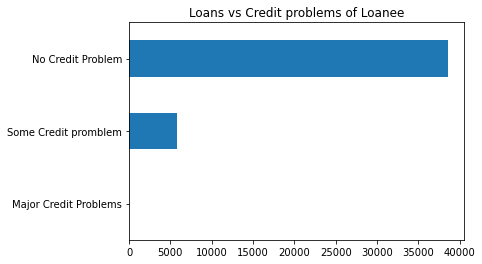

In [288]:
df_imputed['Credit Problems'] = df_imputed['Number_of_Credit_Problems'].apply(lambda x: "No Credit Problem" if x==0 else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))
df_imputed['Credit Problems'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Loans vs Credit problems of Loanee")

In [289]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Credit Problems'],drop_first = True))
df_imputed = df_imputed.drop(['Credit Problems','Number_of_Credit_Problems'], axis=1)

In [290]:
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens,Good,Very Good,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem
0,1.00,23023.00,0.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,23188.00,31732.00,0.00,0.00,0,0,0,1,1,0
1,0.00,8126.00,1.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,6135.00,13095.60,0.20,0.00,1,0,0,0,1,0
2,1.00,5042.00,1.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,6698.00,17958.00,0.00,0.00,0,1,0,1,1,0
3,0.00,14139.00,0.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,5928.00,7273.00,0.00,0.00,1,0,0,0,1,0
4,0.00,15191.00,0.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,10714.00,11243.00,0.00,0.00,1,0,0,1,1,0


## Binning - Years_of_Credit_History

In [291]:
df_imputed['Credit Age'] = df_imputed['Years_of_Credit_History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [292]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Credit Age'],drop_first = True))
df_imputed = df_imputed.drop(['Credit Age','Years_of_Credit_History'], axis =1)
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,...,Bankruptcies,Tax Liens,Good,Very Good,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age
0,1.00,23023.00,0.00,0.00,72230.00,3.00,613.96,17.40,11.00,23188.00,...,0.00,0.00,0,0,0,1,1,0,1,0
1,0.00,8126.00,1.00,2.00,55869.00,3.00,665.78,27.40,14.00,6135.00,...,0.20,0.00,1,0,0,0,1,0,1,0
2,1.00,5042.00,1.00,0.00,40332.00,3.00,873.86,11.00,6.00,6698.00,...,0.00,0.00,0,1,0,1,1,0,1,0
3,0.00,14139.00,0.00,2.00,70693.00,3.00,482.48,33.00,8.00,5928.00,...,0.00,0.00,1,0,0,0,1,0,0,0
4,0.00,15191.00,0.00,0.00,38442.00,3.00,611.87,0.00,4.00,10714.00,...,0.00,0.00,1,0,0,1,1,0,0,0


## Handling Outliers in Annual_Income

In [293]:
meanxoutlier = df_imputed[df_imputed['Annual_Income'] < 99999999.00 ]['Annual_Income'].mean()
stddevxoutlier = df_imputed[df_imputed['Annual_Income'] < 99999999.00 ]['Annual_Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [294]:
df_imputed['Annual_Income'] = df_imputed['Annual_Income'].apply(lambda x: "Low Income" if x<=poorline else ("Average Income" if x>poorline and x<richline else "High Income"))
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Annual_Income'],drop_first = True))
df_imputed = df_imputed.drop(['Annual_Income'], axis=1)
df_imputed.head()

,Loan Status,Current_Loan_Amount,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,...,Good,Very Good,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,High Income,Low Income
0,1.00,23023.00,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,...,0,0,0,1,1,0,1,0,0,0
1,0.00,8126.00,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,...,1,0,0,0,1,0,1,0,0,0
2,1.00,5042.00,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,...,0,1,0,1,1,0,1,0,0,0
3,0.00,14139.00,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,...,1,0,0,0,1,0,0,0,0,0
4,0.00,15191.00,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,...,1,0,0,1,1,0,0,0,0,0


## Handling Outliers in Annual_Income

In [295]:
lmeanxoutlier = df_imputed[df_imputed['Current_Loan_Amount'] < 99999999.00 ]['Current_Loan_Amount'].mean()
lstddevxoutlier = df_imputed[df_imputed['Current_Loan_Amount'] < 99999999.00 ]['Current_Loan_Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)
df_imputed['Current_Loan_Amount'] = df_imputed['Current_Loan_Amount'].apply(lambda x: "Small Loan" if x<=lowrange else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

5735.0418905873685 22265.766270657965


In [296]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Current_Loan_Amount'],drop_first = True))
df_imputed = df_imputed.drop(['Current_Loan_Amount'], axis=1)

In [297]:
df_imputed.head()

,Loan Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,...,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan
0,1.00,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0.00,...,0,1,1,0,1,0,0,0,0,0
1,0.00,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,0.20,...,0,0,1,0,1,0,0,0,1,0
2,1.00,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0.00,...,0,1,1,0,1,0,0,0,0,1
3,0.00,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,0.00,...,0,0,1,0,0,0,0,0,1,0
4,0.00,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,0.00,...,0,1,1,0,0,0,0,0,1,0


In [298]:
df_imputed.columns

Index(['Loan Status', 'Term', 'Home_Ownership', 'Purpose', 'Monthly Debt',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax Liens', 'Good', 'Very Good', 'Emp Level Mid', 'Emp Senior',
       'No Credit Problem', 'Some Credit promblem', 'Good Credit Age',
       'Short Credit Age', 'High Income', 'Low Income', 'Medium Loan',
       'Small Loan'],
      dtype='object')

## Binning - Tax Liens

In [299]:
df_imputed['Tax Liens'] = df_imputed['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))
df_imputed= df_imputed.join(pd.get_dummies(df_imputed['Tax Liens'],drop_first = True))
df_imputed= df_imputed.drop(['Tax Liens'],axis=1)

In [300]:
df_imputed.head()

,Loan Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,...,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens
0,1.00,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0.00,...,1,0,1,0,0,0,0,0,1,0
1,0.00,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,0.20,...,1,0,1,0,0,0,1,0,1,0
2,1.00,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0.00,...,1,0,1,0,0,0,0,1,1,0
3,0.00,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,0.00,...,1,0,0,0,0,0,1,0,1,0
4,0.00,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,0.00,...,1,0,0,0,0,0,1,0,1,0


## Binning - Bankruptcies

In [301]:
df_imputed['Bankruptcies'] = df_imputed['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))
df_imputed= df_imputed.join(pd.get_dummies(df_imputed['Bankruptcies'],drop_first = True))
df_imputed= df_imputed.drop(['Bankruptcies'],axis=1)
df_imputed.head()

,Loan Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,...,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,1.00,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0,...,1,0,0,0,0,0,1,0,1,0
1,0.00,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,1,...,1,0,0,0,1,0,1,0,0,1
2,1.00,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0,...,1,0,0,0,0,1,1,0,1,0
3,0.00,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,1,...,0,0,0,0,1,0,1,0,1,0
4,0.00,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,1,...,0,0,0,0,1,0,1,0,1,0


### This data is without scaling

In [302]:
df_imputed_wosc = df_imputed

In [303]:
y = df_imputed_wosc['Loan Status']
X = df_imputed_wosc.drop(['Loan Status'],axis=1)

## Train test split

In [304]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic Regression

In [307]:
lregclassifier = LogisticRegression()
lregclassifier.fit(X,y)
#lregprediction = lregclassifier.predict(X_test)
print("Score: ",lregclassifier.score(X, y))

Score:  0.7164484635803302


In [ ]:
tneg, fpos, fneg, tpos = confusion_matrix(y, lregprediction).ravel()
print(tneg,fpos,fneg,tpos)

## Scaling done after imputation

In [308]:
df_imputed_wsc = df_imputed

In [309]:
y = df_imputed_wsc['Loan Status']
X = df_imputed_wsc.drop(['Loan Status'],axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [310]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_scaled = ro_scaler.fit_transform(X)
#x_test = ro_scaler.fit_transform(X_test)

### SMOTE Analysis

In [312]:
df_smote = df_imputed

In [313]:
df_smote

,Loan Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,...,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,1.00,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0,...,1,0,0,0,0,0,1,0,1,0
1,0.00,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,1,...,1,0,0,0,1,0,1,0,0,1
2,1.00,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0,...,1,0,0,0,0,1,1,0,1,0
3,0.00,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,1,...,0,0,0,0,1,0,1,0,1,0
4,0.00,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,1,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44449,0.00,1.00,2.00,3.00,1089.12,51.00,13.00,12844.00,23352.00,1,...,0,0,0,0,1,0,1,0,1,0
44450,1.00,1.00,2.00,3.00,509.07,0.00,8.00,3685.00,8570.00,0,...,1,0,0,0,0,1,1,0,0,1
44451,0.00,0.00,2.00,3.00,1224.49,0.00,16.00,14058.00,23828.00,0,...,1,0,0,0,0,0,1,0,1,0
44452,0.00,0.00,2.00,3.00,242.24,24.00,11.00,6618.00,19295.00,0,...,0,0,0,0,1,0,1,0,1,0


In [314]:
df_smote = df_smote.rename(columns={'Loan Status': 'Loan_Status'})

### Resampling
- A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

31868
12586


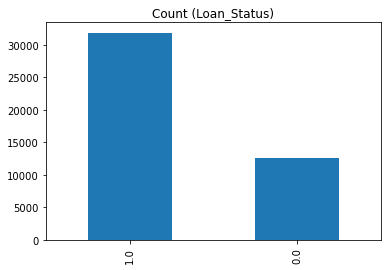

In [315]:
# Class count
count_class_0, count_class_1 = df_smote.Loan_Status.value_counts()
print(count_class_0)
print(count_class_1)
df_smote.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)');

In [316]:
# Divide by class
df_class_0 = df_smote[df_smote['Loan_Status'] == 1]
df_class_1 = df_smote[df_smote['Loan_Status'] == 0]
df_class_0

,Loan_Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,...,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,1.00,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0,...,1,0,0,0,0,0,1,0,1,0
2,1.00,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0,...,1,0,0,0,0,1,1,0,1,0
5,1.00,0.00,2.00,7.00,544.58,0.00,7.00,3126.00,13711.00,1,...,0,0,0,0,1,0,1,0,0,1
6,1.00,1.00,0.00,5.00,240.16,0.00,4.00,533.00,2961.00,1,...,0,0,0,0,0,1,1,0,0,1
7,1.00,1.00,0.00,3.00,633.43,0.00,10.00,8854.00,10719.00,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44445,1.00,1.00,0.00,3.00,2040.82,1.00,13.00,27179.00,28791.00,1,...,0,0,0,0,1,0,1,0,1,0
44447,1.00,0.00,1.00,3.00,1355.33,0.00,30.00,21356.00,41227.00,1,...,1,0,0,0,1,0,1,0,1,0
44448,1.00,0.00,2.00,3.00,708.19,0.00,15.00,10059.00,19495.00,1,...,1,0,0,0,1,0,1,0,1,0
44450,1.00,1.00,2.00,3.00,509.07,0.00,8.00,3685.00,8570.00,0,...,1,0,0,0,0,1,1,0,0,1


## Random over-sampling


Random over-sampling:
1.00    31868
0.00    31868
Name: Loan_Status, dtype: int64


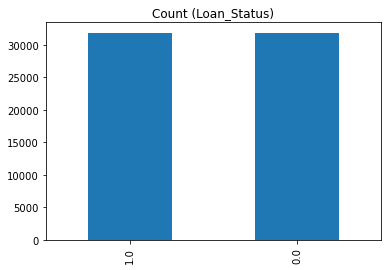

In [317]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Loan_Status.value_counts())

df_test_over.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)');

### Random under-sampling


Random under-sampling:
1.00    12586
0.00    12586
Name: Loan_Status, dtype: int64


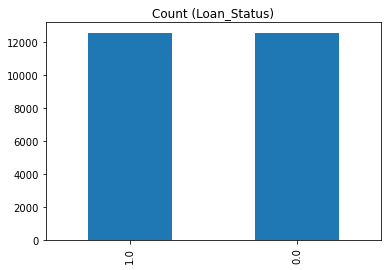

In [318]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Loan_Status.value_counts())

df_test_under.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)');

### Over-sampling: SMOTE
- SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

In [319]:
x1 = df_smote.drop(['Loan_Status'], axis=1)
y1 = df_smote['Loan_Status']
df_smote

,Loan_Status,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,...,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,1.00,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0,...,1,0,0,0,0,0,1,0,1,0
1,0.00,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,1,...,1,0,0,0,1,0,1,0,0,1
2,1.00,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0,...,1,0,0,0,0,1,1,0,1,0
3,0.00,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,1,...,0,0,0,0,1,0,1,0,1,0
4,0.00,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,1,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44449,0.00,1.00,2.00,3.00,1089.12,51.00,13.00,12844.00,23352.00,1,...,0,0,0,0,1,0,1,0,1,0
44450,1.00,1.00,2.00,3.00,509.07,0.00,8.00,3685.00,8570.00,0,...,1,0,0,0,0,1,1,0,0,1
44451,0.00,0.00,2.00,3.00,1224.49,0.00,16.00,14058.00,23828.00,0,...,1,0,0,0,0,0,1,0,1,0
44452,0.00,0.00,2.00,3.00,242.24,24.00,11.00,6618.00,19295.00,0,...,0,0,0,0,1,0,1,0,1,0


In [320]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [321]:
import imblearn

In [322]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'minority')
X_sm, y_sm = smote.fit_resample(x1, y1)

In [323]:
y_sm.value_counts()

1.00    31868
0.00    31868
Name: Loan_Status, dtype: int64

### Over-sampling followed by under-sampling
- Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [324]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt1, y_smt1 = smt.fit_resample(x1, y1)

In [325]:
y_smt1.value_counts()

1.00    28874
0.00    28874
Name: Loan_Status, dtype: int64

### Random Forest after SMOTE

In [326]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,23023,0,597,10,0,72230,3,613.96,14.00,NaN,11,0,23188,NaN,NaN,NaN
1,0,8126,1,696,2,2,55869,3,665.78,10.90,NaN,14,0,6135,NaN,NaN,NaN
2,1,5042,1,745,10,0,40332,3,873.86,16.40,11.00,6,0,6698,17958.00,0.00,0.00
3,0,14139,0,677,1,2,70693,3,482.48,19.50,33.00,8,0,5928,7273.00,0.00,0.00
4,0,15191,0,716,10,0,38442,3,611.87,17.80,0.00,4,0,10714,11243.00,0.00,0.00


Confusion matrix:
[[20535  8339]
 [ 3952 24922]]
AUC: 0.8674413752329719


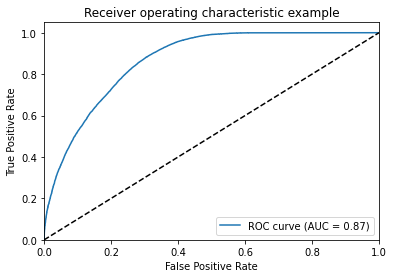

In [327]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import numpy as np

# create a sample dataset
X = X_smt1
y = y_smt1

# train the random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_features=6, max_depth=8)
clf.fit(X, y)

# make predictions
y_pred = clf.predict(X)

# get the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion matrix:")
print(cm)

# get the AUC
y_pred_proba = clf.predict_proba(X)[:,1]
auc = roc_auc_score(y, y_pred_proba)
print("AUC:", auc)

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

Confusion matrix:
[[21691  7183]
 [17189 11685]]
AUC: 0.6027251456600129


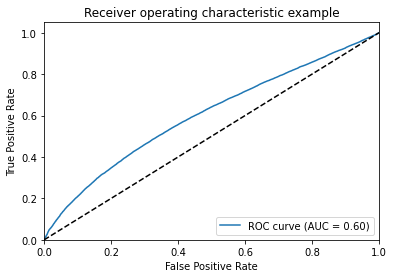

In [328]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import numpy as np

# create a sample dataset
X = X_smt1
y = y_smt1

# train the logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

# make predictions
y_pred = clf.predict(X)

# get the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion matrix:")
print(cm)

# get the AUC
y_pred_proba = clf.predict_proba(X)[:,1]
auc = roc_auc_score(y, y_pred_proba)
print("AUC:", auc)

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## xgboost

In [331]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score

# Load data


# Define features and target
X = X_smt1
y = y_smt1

# Train XGBoost model
model = xgb.XGBClassifier()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Create confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate AUC
auc = roc_auc_score(y, y_pred)
print("AUC:", auc)

Confusion matrix:
[[21264  7610]
 [ 1265 27609]]
AUC: 0.8463150238969315


With Random forest we are getting good results